# Credit Card Fraud Detection

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Load Data

In [2]:
def load_data(name):
    df = pd.read_csv(f"data/{name}")
    return df

In [3]:
df = load_data("fraudTrain.csv")

# Analyze

In [4]:
df.shape

(1296675, 23)

In [5]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# Drop columns
# A few columns seems very little-relevant while predicting if trans is fraud or not
# such as name, job, dob, trans_no 
df.drop(['Unnamed: 0', 'first', 'last', 'job', 'dob', 'trans_num', 'city_pop', 'unix_time', 'street'], axis=1, inplace=True)
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,42.788940,-103.241160,0


In [7]:
df.tail()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,merch_lat,merch_long,is_fraud
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,84735,37.7175,-112.4777,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,21790,39.2667,-77.5101,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,57756,43.3526,-102.5411,42.788940,-103.241160,0
1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,M,Sula,MT,59871,45.8433,-113.8748,46.565983,-114.186110,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

In [9]:
df.describe()

,cc_num,amt,zip,lat,long,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,6.751027e+01,-6.695090e+01,1.000000e+00


# Data Preprocessing

In [10]:
# check for null
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
# Check for duplicate
df.duplicated().sum()

0

In [12]:
# Let's see how many merchants are there
merchants = np.unique(df['merchant'])
print(len(merchants))
print(merchants)

693
['fraud_Abbott-Rogahn' 'fraud_Abbott-Steuber' 'fraud_Abernathy and Sons'
 'fraud_Abshire PLC' 'fraud_Adams, Kovacek and Kuhlman'
 'fraud_Adams-Barrows' 'fraud_Altenwerth, Cartwright and Koss'
 'fraud_Altenwerth-Kilback' 'fraud_Ankunding LLC'
 'fraud_Ankunding-Carroll' 'fraud_Armstrong, Walter and Gottlieb'
 'fraud_Auer LLC' 'fraud_Auer-Mosciski' 'fraud_Auer-West'
 'fraud_Bahringer Group' 'fraud_Bahringer, Bergnaum and Quitzon'
 'fraud_Bahringer, Osinski and Block'
 'fraud_Bahringer, Schoen and Corkery' 'fraud_Bahringer-Larson'
 'fraud_Bahringer-Streich' 'fraud_Bailey-Morar' 'fraud_Balistreri-Nader'
 'fraud_Barrows PLC' 'fraud_Bartoletti and Sons' 'fraud_Bartoletti-Wunsch'
 'fraud_Barton Inc' 'fraud_Barton LLC' 'fraud_Bashirian Group'
 'fraud_Bauch-Blanda' 'fraud_Bauch-Raynor' 'fraud_Baumbach Ltd'
 'fraud_Baumbach, Feeney and Morar' 'fraud_Baumbach, Hodkiewicz and Walsh'
 'fraud_Baumbach, Strosin and Nicolas' 'fraud_Bechtelar-Rippin'
 'fraud_Becker, Harris and Harvey' 'fraud_Bednar 

In [13]:
# In what categories is the money spent?
categories = np.unique(df['category'])
print(len(categories))
print(categories)

14
['entertainment' 'food_dining' 'gas_transport' 'grocery_net' 'grocery_pos'
 'health_fitness' 'home' 'kids_pets' 'misc_net' 'misc_pos' 'personal_care'
 'shopping_net' 'shopping_pos' 'travel']


In [14]:
categories_count = df['category'].value_counts()
categories_count

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

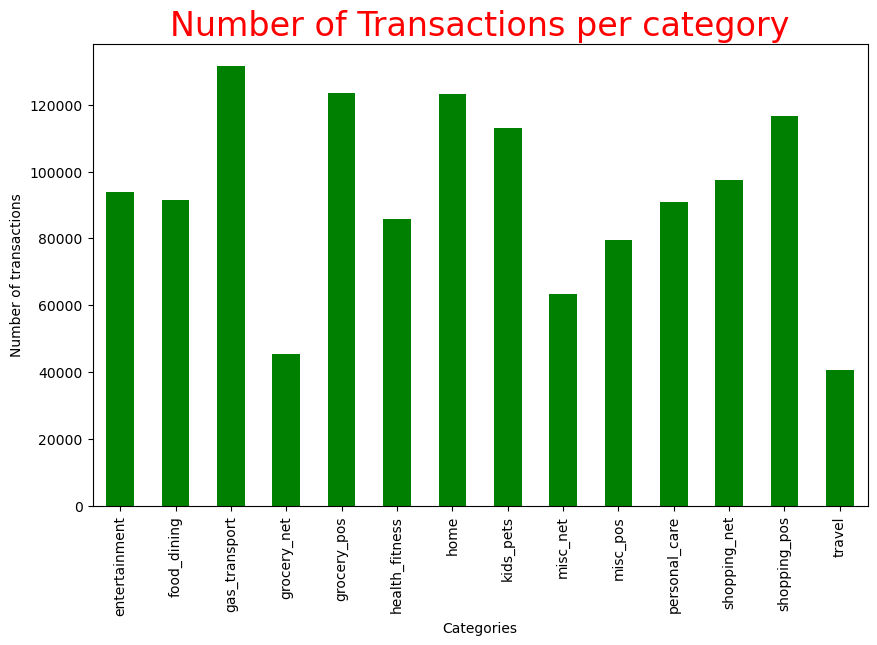

In [15]:
plt.figure(figsize=(10,6))
categories_count.sort_index().plot(kind='bar', color='green')
plt.title("Number of Transactions per category", color='r', fontsize=24)
plt.xlabel("Categories")
plt.ylabel("Number of transactions")
plt.show()

In [16]:
cat_counts = df.groupby(['category','is_fraud'])['is_fraud'].count().unstack()
cat_counts

is_fraud,0,1
category,,
entertainment,93781,233
food_dining,91310,151
gas_transport,131041,618
grocery_net,45318,134
grocery_pos,121895,1743
health_fitness,85746,133
home,122917,198
kids_pets,112796,239
misc_net,62372,915


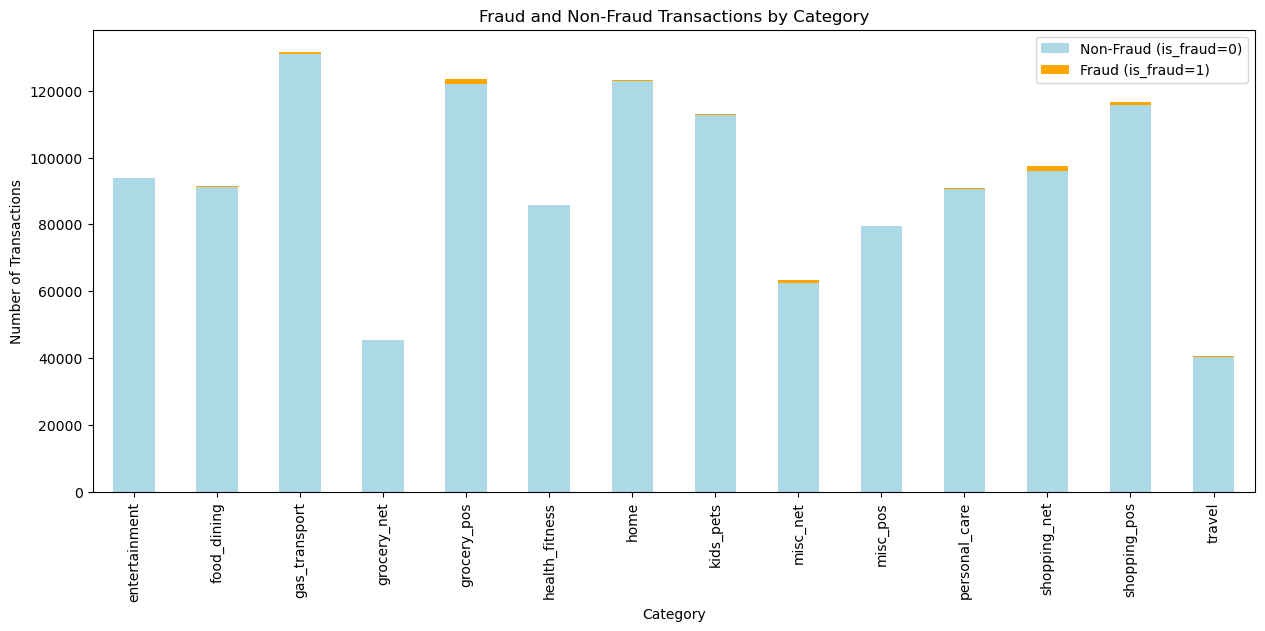

In [17]:
ax = cat_counts.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(15, 6))
ax.set_ylabel("Number of Transactions")
ax.set_xlabel("Category")
ax.set_title("Fraud and Non-Fraud Transactions by Category")

# Adding legend
plt.legend(["Non-Fraud (is_fraud=0)", "Fraud (is_fraud=1)"])

# Show the plot
plt.show()

In [18]:
# Let's see about dates

start_date = df['trans_date_trans_time'].min()
end_date = df['trans_date_trans_time'].max()
print(start_date)
print(end_date)

2019-01-01 00:00:18
2020-06-21 12:13:37


In [19]:
# year-month of transaction
df['month_year'] = pd.to_datetime(df['trans_date_trans_time']).dt.to_period('M')

In [20]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,merch_lat,merch_long,is_fraud,month_year
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,36.011293,-82.048315,0,2019-01
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,49.159047,-118.186462,0,2019-01
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,43.150704,-112.154481,0,2019-01
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,47.034331,-112.561071,0,2019-01
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,38.674999,-78.632459,0,2019-01


In [21]:
# Let's see how many transactions are there per month
transactions_per_month_year = df['month_year'].value_counts()

print("\nTransactions per Month-Year:")
print(transactions_per_month_year)


Transactions per Month-Year:
month_year
2019-12    141060
2019-08     87359
2019-07     86596
2019-06     86064
2020-05     74343
2020-03     72850
2019-05     72532
2019-03     70939
2019-09     70652
2019-11     70421
2019-10     68758
2019-04     68078
2020-04     66892
2020-06     57747
2019-01     52525
2020-01     52202
2019-02     49866
2020-02     47791
Freq: M, Name: count, dtype: int64


In [22]:
# Mean transaction per month
df.groupby('month_year')['amt'].mean()

month_year
2019-01    71.580200
2019-02    72.286974
2019-03    70.876195
2019-04    69.941899
2019-05    69.774766
2019-06    70.138472
2019-07    69.795680
2019-08    69.223419
2019-09    70.059367
2019-10    70.555679
2019-11    69.911711
2019-12    70.311776
2020-01    70.170961
2020-02    70.514198
2020-03    70.859521
2020-04    70.132898
2020-05    70.538407
2020-06    71.120314
Freq: M, Name: amt, dtype: float64

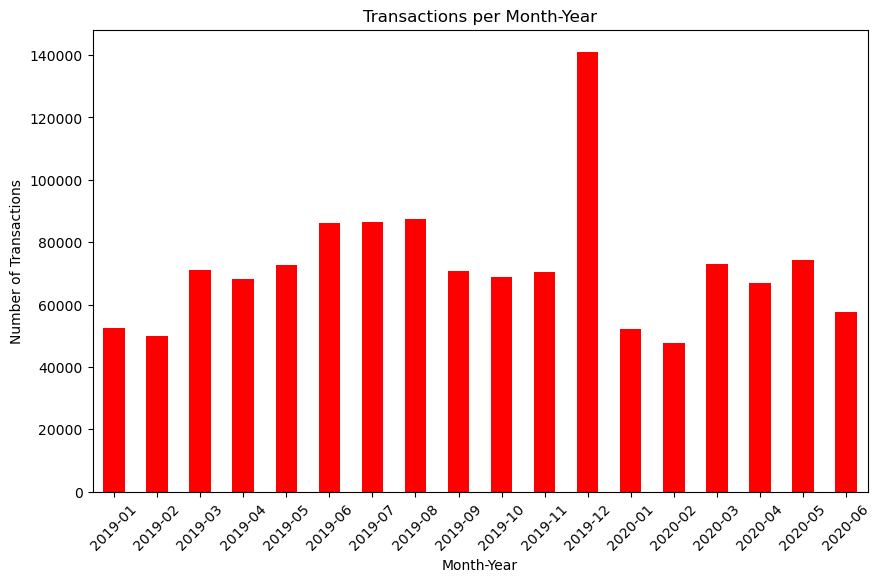

In [23]:
plt.figure(figsize=(10, 6))
transactions_per_month_year.sort_index().plot(kind='bar', color='red')
plt.title('Transactions per Month-Year')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [24]:
trans_per_month = df.groupby(['month_year', 'is_fraud'])['is_fraud'].count().unstack()
trans_per_month

is_fraud,0,1
month_year,,
2019-01,52019,506
2019-02,49349,517
2019-03,70445,494
2019-04,67702,376
2019-05,72124,408
2019-06,85710,354
2019-07,86265,331
2019-08,86977,382
2019-09,70234,418


<Axes: xlabel='month_year'>

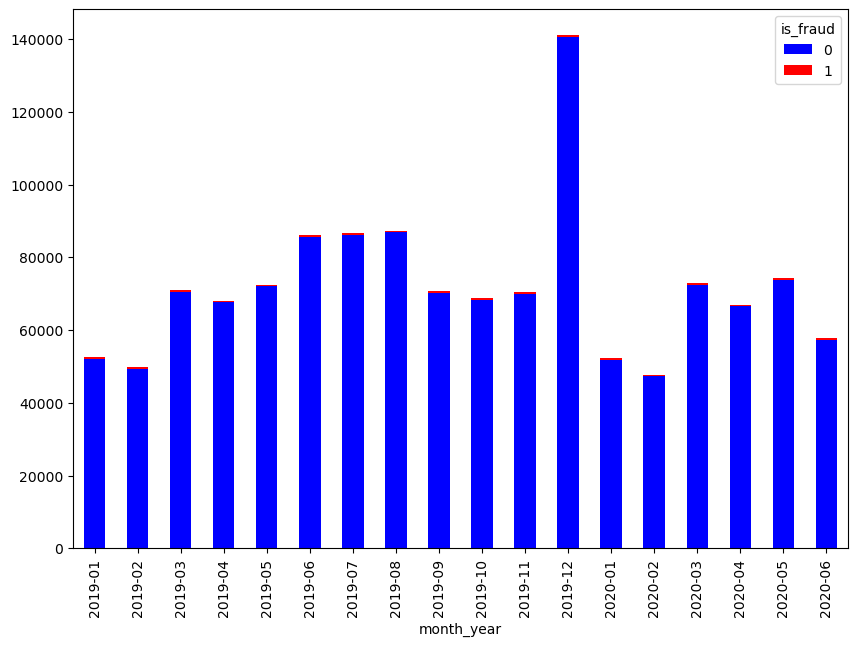

In [25]:
trans_per_month.plot(kind='bar', stacked=True, color=['blue', 'red'], figsize=(10,7))
# ax = cat_counts.plot(kind='bar', stacked=True, color=['lightblue', 'orange'], figsize=(15, 6))


In [26]:
# Frauds by city
city_frauds = df.groupby(['city', 'is_fraud'])['is_fraud'].count()
print(city_frauds)

city                       is_fraud
Achille                    0            519
                           1             13
Acworth                    0           2084
                           1             13
Adams                      0            516
                                       ... 
Yellowstone National Park  0            513
                           1             12
Zaleski                    0           1545
                           1             12
Zavalla                    0           1537
Name: is_fraud, Length: 1538, dtype: int64


In [27]:
city_frauds = df.groupby(['city', 'is_fraud'])['is_fraud'].count().unstack()
top10 = city_frauds.sum(axis=1).sort_values(ascending=False).head(10)
print(top10)

city
Birmingham     5617.0
San Antonio    5130.0
Utica          5105.0
Phoenix        5075.0
Meridian       5060.0
Thomas         4634.0
Conway         4613.0
Cleveland      4604.0
Warren         4599.0
Houston        4168.0
dtype: float64


In [28]:
# Gender
gender_count = df['gender'].value_counts()
gender_count

gender
F    709863
M    586812
Name: count, dtype: int64

<Axes: title={'center': 'Transactions per Gender'}, xlabel='gender'>

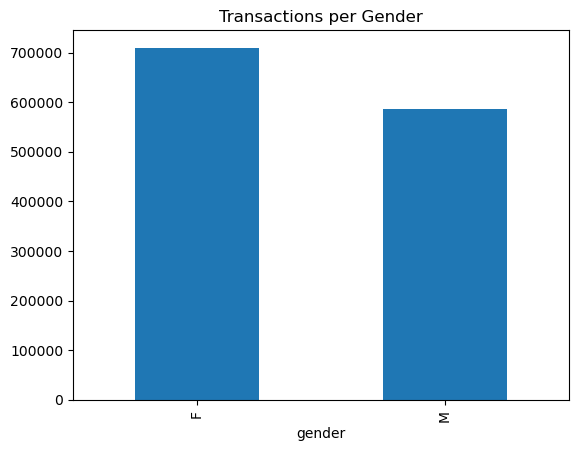

In [29]:
plt.title('Transactions per Gender')
gender_count.plot(kind='bar')

In [30]:
# sum of amount spent by each gender
trans_amount_gender = df.groupby('gender')['amt'].sum()
trans_amount_gender

gender
F    49832612.83
M    41389816.07
Name: amt, dtype: float64

In [31]:
mean_spent_gender = df.groupby('gender')['amt'].mean()
mean_spent_gender

gender
F    70.200324
M    70.533350
Name: amt, dtype: float64

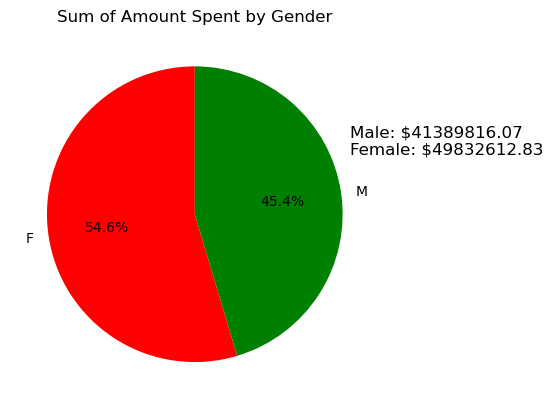

In [32]:
plt.pie(trans_amount_gender, labels=trans_amount_gender.index, autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.text(1.05, 0.5, f"Male: ${trans_amount_gender['M']}\nFemale: ${trans_amount_gender['F']}", 
         horizontalalignment='left', verticalalignment='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.title('Sum of Amount Spent by Gender')
plt.show()

In [33]:
# So, what's the ration of fraud trans
trans_type_count = df['is_fraud'].value_counts()
print(trans_type_count)
print(f"fraud ratio = {trans_type_count[1]/trans_type_count[0]}")

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
fraud ratio = 0.005822355331224998


<Axes: xlabel='is_fraud'>

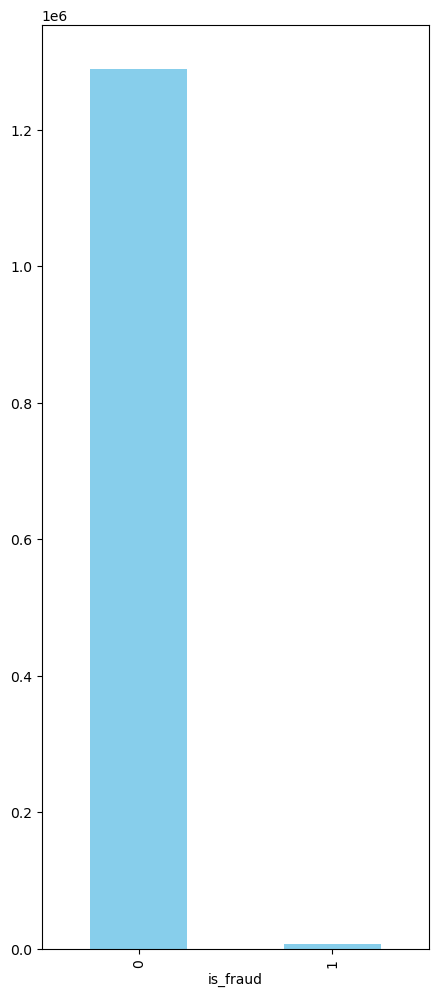

In [34]:
plt.figure(figsize=(5,12))
trans_type_count.plot(kind='bar', color='skyblue')

In [35]:
# Amount spent in fraud and non-fraud trans
spend = df.groupby('is_fraud')['amt'].sum()
print(spend)

is_fraud
0    87234340.29
1     3988088.61
Name: amt, dtype: float64


In [36]:
# Mean spent on each
mean_spent = df.groupby('is_fraud')['amt'].mean()
mean_spent

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

In [37]:
# Total cards
cards = np.unique(df['cc_num'])
print(len(cards))

983


In [38]:
cc_count = df['cc_num'].value_counts()
print(cc_count)

cc_num
571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: count, Length: 983, dtype: int64


In [39]:
sum = df.groupby('cc_num')['amt'].sum()
sum

cc_num
60416207185             85043.47
60422928733            105640.20
60423098130             58673.63
60427851591             59129.61
60487002085             25160.11
                         ...    
4958589671582726883     97973.69
4973530368125489546     81508.22
4980323467523543940     39600.18
4989847570577635369     88195.62
4992346398065154184    139690.45
Name: amt, Length: 983, dtype: float64

array([[<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

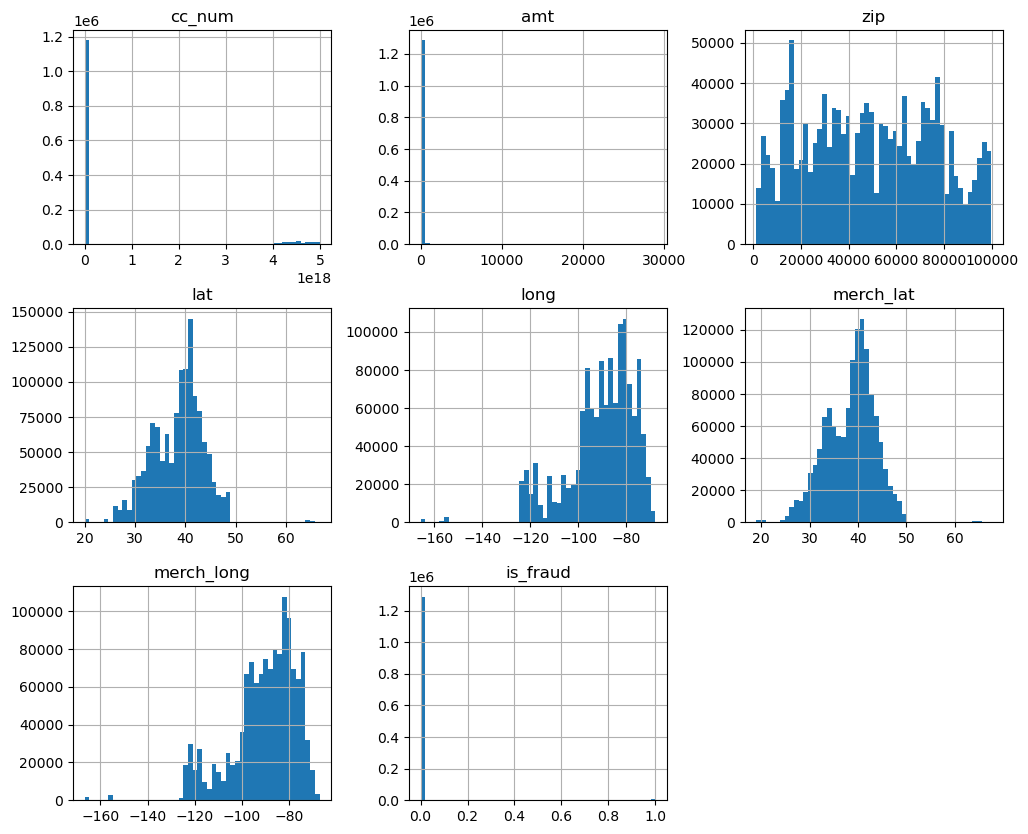

In [40]:
df.hist(bins=50, figsize=(12,10))

<Axes: >

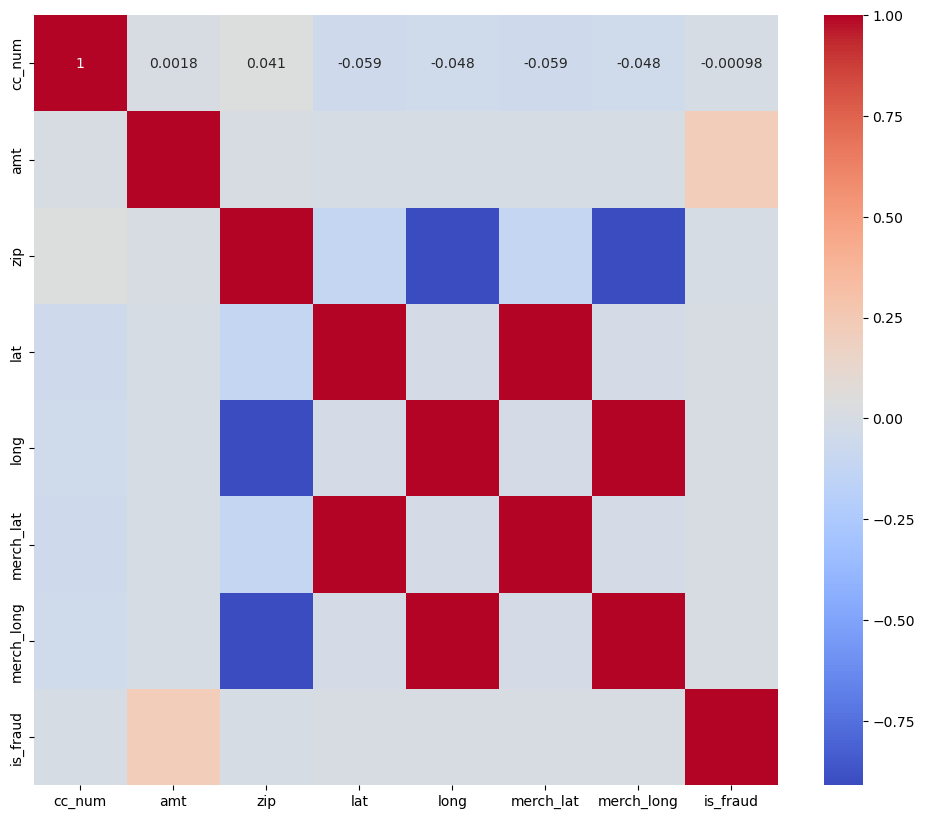

In [41]:
# Correlation heatmap
num_cols = df.select_dtypes(include = ['float64','int64'])
plt.figure(figsize=(12,10))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm' )

In [42]:
# Dropping few more columns
X= df.drop(columns=['cc_num', 'zip', 'trans_date_trans_time', 'month_year'])
X 

,merchant,category,amt,gender,city,state,lat,long,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,42.788940,-103.241160,0


In [43]:
X.shape

(1296675, 11)

In [44]:
X = pd.get_dummies(X, columns=['merchant', 'category', 'gender', 'city', 'state'], dtype=int)

In [45]:
X.shape

(1296675, 1660)

In [46]:
y_train = X['is_fraud']
X_train = X.drop('is_fraud', axis=1)

In [47]:
print(X_train.shape)
print(y_train.shape)

(1296675, 1659)
(1296675,)


# Load and clean the test data

In [48]:
df_test = load_data("fraudTest.csv")

In [49]:
df_test.shape

(555719, 23)

In [50]:
df_test.drop(columns=['Unnamed: 0', 'first', 'last', 'job', 'dob', 'trans_num', 'city_pop', 'unix_time', 'street'], axis=1, inplace=True)
df_test.drop(columns=['cc_num', 'zip', 'trans_date_trans_time'], inplace=True)

In [51]:
df_test.shape

(555719, 11)

In [57]:
df_test.shape

(555719, 11)

In [58]:
X_test = df_test.drop('is_fraud', axis=1)
y_test = df_test['is_fraud']

In [56]:
print(y_test.shape)
print(X_test.shape)

(555719,)
(555719, 10)


In [59]:
# Check feature order consistency in train and test data
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['amt', 'lat', 'long', 'merch_lat', 'merch_long',
       'merchant_fraud_Abbott-Rogahn', 'merchant_fraud_Abbott-Steuber',
       'merchant_fraud_Abernathy and Sons', 'merchant_fraud_Abshire PLC',
       'merchant_fraud_Adams, Kovacek and Kuhlman',
       ...
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA', 'state_WI', 'state_WV', 'state_WY'],
      dtype='object', length=1659)
X_test columns: Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'lat', 'long',
       'merch_lat', 'merch_long'],
      dtype='object')


In [60]:
# Align the features with the train data
common_columns = X_train.columns.intersection(X_test.columns)
X_test_aligned = X_test[common_columns]
X_train_aligned = X_train[common_columns]
print(X_train_aligned.shape)
print(X_test_aligned.shape)

(1296675, 5)
(555719, 5)


# Decision Tree Model 

In [61]:
dt_model = DecisionTreeClassifier()

In [62]:
dt_model.fit(X_train_aligned,y_train)

DecisionTreeClassifier()

# Prediction

In [63]:
y_pred=dt_model.predict(X_test_aligned)

In [64]:
# Accuracy Score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy score : {accuracy*100:.2f}%")

Accuracy score : 99.30%


In [65]:
# Class report
class_rep =classification_report(y_test,y_pred,labels=[1,0])
print(class_rep)

              precision    recall  f1-score   support

           1       0.18      0.22      0.20      2145
           0       1.00      1.00      1.00    553574

    accuracy                           0.99    555719
   macro avg       0.59      0.61      0.60    555719
weighted avg       0.99      0.99      0.99    555719



## Conclusion

### Thus, the model can predict whether the given sms is spam or not with accuracy of 99.30%